# Restriction Enzimes recognition sequences

In [6]:
#%%writefile pald_funcs.py 
from Bio.Seq import Seq

def is_palindromic(lseq):
    '''Given a list of strings returns a list of 1 [0] if the
    corresponding string is [is not] palindromic'''
    assert isinstance(lseq, list), 'Input to is_palindromic() must be a list of strings'
    return [i == i.reverse_complement() for i in map(Seq,lseq)]

def get_palindromic(lseq):
    '''Given a list of strings returns a list of the palindromic strings'''
    assert isinstance(lseq, list), 'Input to is_palindromic() must be a list of strings'
    return [str(i) for i in map(Seq,lseq) if i == i.reverse_complement()]

Writing pald_funcs.py


# This is really a scratch pad (see the following cell for the actual code)

In [ ]:
from pprint import pprint

from Bio import motifs
import openpyxl as opxl
import matplotlib
import matplotlib.pyplot as plt

# excel with viruses UR size m=3,4,5
file = '/Users/yoramzarai/work/school/Simulation/Viruses/Data_stats/UR_rnd_dsDNA.xlsx'

# starndard abbreviations (currently not used)
nabbrev = { 'R' : ['G', 'A'],
            'Y' : ['C', 'T'],
            'M' : ['A', 'C'],
            'K' : ['G', 'T'],
            'S' : ['G', 'C'],
            'W' : ['A', 'T'],
            'B' : ['C', 'G', 'T'],
            'D' : ['A', 'G', 'T'],
            'H' : ['A', 'C', 'T'],
            'V' : ['A', 'C', 'G'],
            'N' : ['A', 'C', 'G', 'T']}

# dictionary with recog. seq. : Enzyme name
# This is manually taken from REBASE Type II Restriction Enzumes list 
# class of Recognition Sequences (http://rebase.neb.com/cgi-bin/classlist)
# recognition sequences of 4 bp
rseq_dict4 = { 'AATT' : ['TspEI'],
       'ACGT' : ['MaeII'], 
       'AGCT' : ['AluI'],
       'CATG' : ['NlaIII'], 
       'CCGG' : ['HpaII'],
       'CGCG' : ['FnuDII'],
       'CTAG' : ['DpnI', 'MboI'],
       'GCGC' : ['GlaI', 'HhaI'],
       'GGCC' : ['AoxI', 'HaeIII'],
       'GTAC' : ['RsaI'],
       'TCGA' : ['TaqI'],
       'TGCA' : ['CviRI'],
       'TTAA' : ['MseI']}

# recognition sequences of 5 bp
rseq_dict5 = {'ACGAG' : ['ObaBS10I'],
              'ACGGA' : ['TspGWI'],
              'ACGGC' : ['BcefI'],
              'ACTGG' : ['BsrI'],
              'ATGAA' : ['TspDTI'],
              'CAGTG' : ['BtsIMutI'],
              'CATCG' : ['CdiI'],
              'CCAGA' : ['BspNCI'],
              'CCATC' : ['BccI'],
              'CCCGC' : ['FauI'],
              'CCCGT' : ['BscGI'],
              'CCTTC' : ['Hin4II'],
              'CTCAG' : ['BseMII'],
              'GAAAG' : ['HpyUM032XIV'],
              'GAAGA' : ['MboII'],
              'GAAGT' : ['SthSt3II'],
              'GACGC' : ['HgaI'],
              'GAGTC' : ['PleI'],
              'GCAGC' : ['BbvI'],
              'GCAGT' : ['PenI'],
              'GCATC' : ['SfaNI'],
              'GCCGC' : ['NgoAVII'],
              'GCCTA' : ['Hpy99XIII'],
              'GCGAA' : ['Cla11845III'],
              'GCGAC' : ['TsuI'],
              'GCGTA' : ['HpyAXIV'],
              'GCTCC' : ['LmnI'],
              'GGATC' : ['BinI'],
              'GGATG' : ['FokI'],
              'GGGAC' : ['FinI'],
              'GGGTC' : ['SimI'],
              'GGTGA' : ['HphI'],
              'GTAAG' : ['Pba2294I'],
              'GTCTC' : ['BsmAI'],
              'TCGAG' : ['SpnRII'],
              'TCGTA' : ['UbaF11I'],
              'TGAAC' : ['Sbo46I']}


# ==============================================================================================

#pprint(rseq_dict4)
rrseq = list(rseq_dict4.keys())
#rrseq = list(map(Seq, rrseq))  # converting to Seq object
#print(rrseq)
#m = motifs.create(rrseq)

#ss = [ 'AGCT', 'AATT', 'ATCC']
#print(is_palindromic(ss))
#print(get_palindromic(ss))

# reading the excel of UR sequences in dsDNA viruses
#xd = opxl.load_workbook(file)
#sheet = xd.active
sheet = opxl.load_workbook(file).active

# select URs to process
colUR4 = 2  # column number (1 for m=3, 2 for m=4, 3 for m=5)
max_rows = 15 # top <max_rows> rows are used 
# ====================================================================
UR4 = []
for i in range(2,max_rows+2):
    UR4.append(sheet.cell(row=i,column=colUR4).value)

print('Testing top {} sequences in {}'.format(max_rows, sheet.cell(row=1,column=colUR4).value))
test_seq = UR4
# full match 
flag = [s for s in test_seq if s in rrseq]
# or, test if subset as well - this returns list of pairs where each pair
# is UR sequence, rrseq where UR was found (need the following two lines)
#tmp_flag = [j if y else i for i in test_seq for j in rrseq for y in range(2) if i in j] 
#flag = tmp_flag[1::2]
test_seq_homog = [i for i in test_seq if len(set(i))==1] # all URs that contain the same nucleotide m times

print('{:2.2f}% found as recognition sequences (excluding homog sequences {:2.2f}%):'\
      .format(len(flag)/len(test_seq)*100, len(flag)/(len(test_seq)-len(test_seq_homog))*100) )
for e, s in enumerate(flag,1):
    print('{i}. Found {seq}, recognize by {enzyme} enzyme'.format(i=e, seq=s, enzyme=','.join(rseq_dict4[s])))

test_seq_pald = get_palindromic(test_seq) # all URs that are palindromic
flag_pald = [s for s in test_seq_pald if s in rrseq]
print('{:2.2f}% of palindromic URs found as recognition sequences'.format(len(flag_pald)/len(test_seq_pald)*100))

# number of enzymes each UR sequence is recognized by
num_enzyme = [len(rseq_dict4[s]) if s in flag else 0 for s in test_seq]
name_enzyme = [','.join(rseq_dict4[s]) if s in flag else '' for s in test_seq]


# number of enzymes each palindromic UR sequence is recognized by
num_enzyme_pald = [len(rseq_dict4[s]) if s in flag_pald else 0 for s in test_seq_pald]
name_enzyme_pald = [','.join(rseq_dict4[s]) if s in flag_pald else '' for s in test_seq_pald]

fig = plt.figure(1,figsize=(10,10)) 
ax1 = plt.subplot(2, 1, 1)
ax1.plot(num_enzyme, 'ro', markersize=6)
plt.xticks(range(0,len(num_enzyme)), test_seq, rotation='vertical', fontsize=14)
plt.yticks(range(0,3))
#plt.ylabel('$n$')
plt.title('Number of recognizing enzymes for Top UR4 in viruses')
plt.grid(linestyle='-', linewidth=0.25)
for i, txt in enumerate(name_enzyme):
    ax1.annotate(txt, (i, num_enzyme[i]), xytext=(i+0.1, num_enzyme[i]), fontsize=12)
ax1.margins(x=.05, y=.2)

ax2 = plt.subplot(2, 1, 2)
ax2.plot(num_enzyme_pald, 'ro', markersize=6)
plt.xticks(range(0,len(num_enzyme_pald)), test_seq_pald, rotation='vertical', fontsize=14)
plt.yticks(range(0,3))
#plt.ylabel('$n$')
plt.title('Number of recognizing enzymes for Top palindromic UR4 in viruses')
plt.grid(linestyle='-', linewidth=0.25)
for i, txt in enumerate(name_enzyme_pald):
    ax2.annotate(txt, xy=(i, num_enzyme_pald[i]), xytext=(i+0.05, num_enzyme_pald[i]), fontsize=12)
plt.tight_layout()

%config InlineBackend.figure_format = 'retina' # Jupyter double resolution plot output for Retina display
plt.show()
fig.savefig('enz_rec.eps') #, transparent=True, dpi=450)

# Code for recognition sequences that are UR

Testing top 17 sequences in UR4
47.06% found as recognition sequences (excluding homog sequences 61.54%):
1. Found CGCG, recognize by FnuDII enzyme
2. Found GGCC, recognize by AoxI,HaeIII enzyme
3. Found AATT, recognize by TspEI enzyme
4. Found TCGA, recognize by TaqI enzyme
5. Found CCGG, recognize by HpaII enzyme
6. Found GCGC, recognize by GlaI,HhaI enzyme
7. Found AGCT, recognize by AluI enzyme
8. Found GTAC, recognize by RsaI enzyme
88.89% of palindromic URs found as recognition sequences


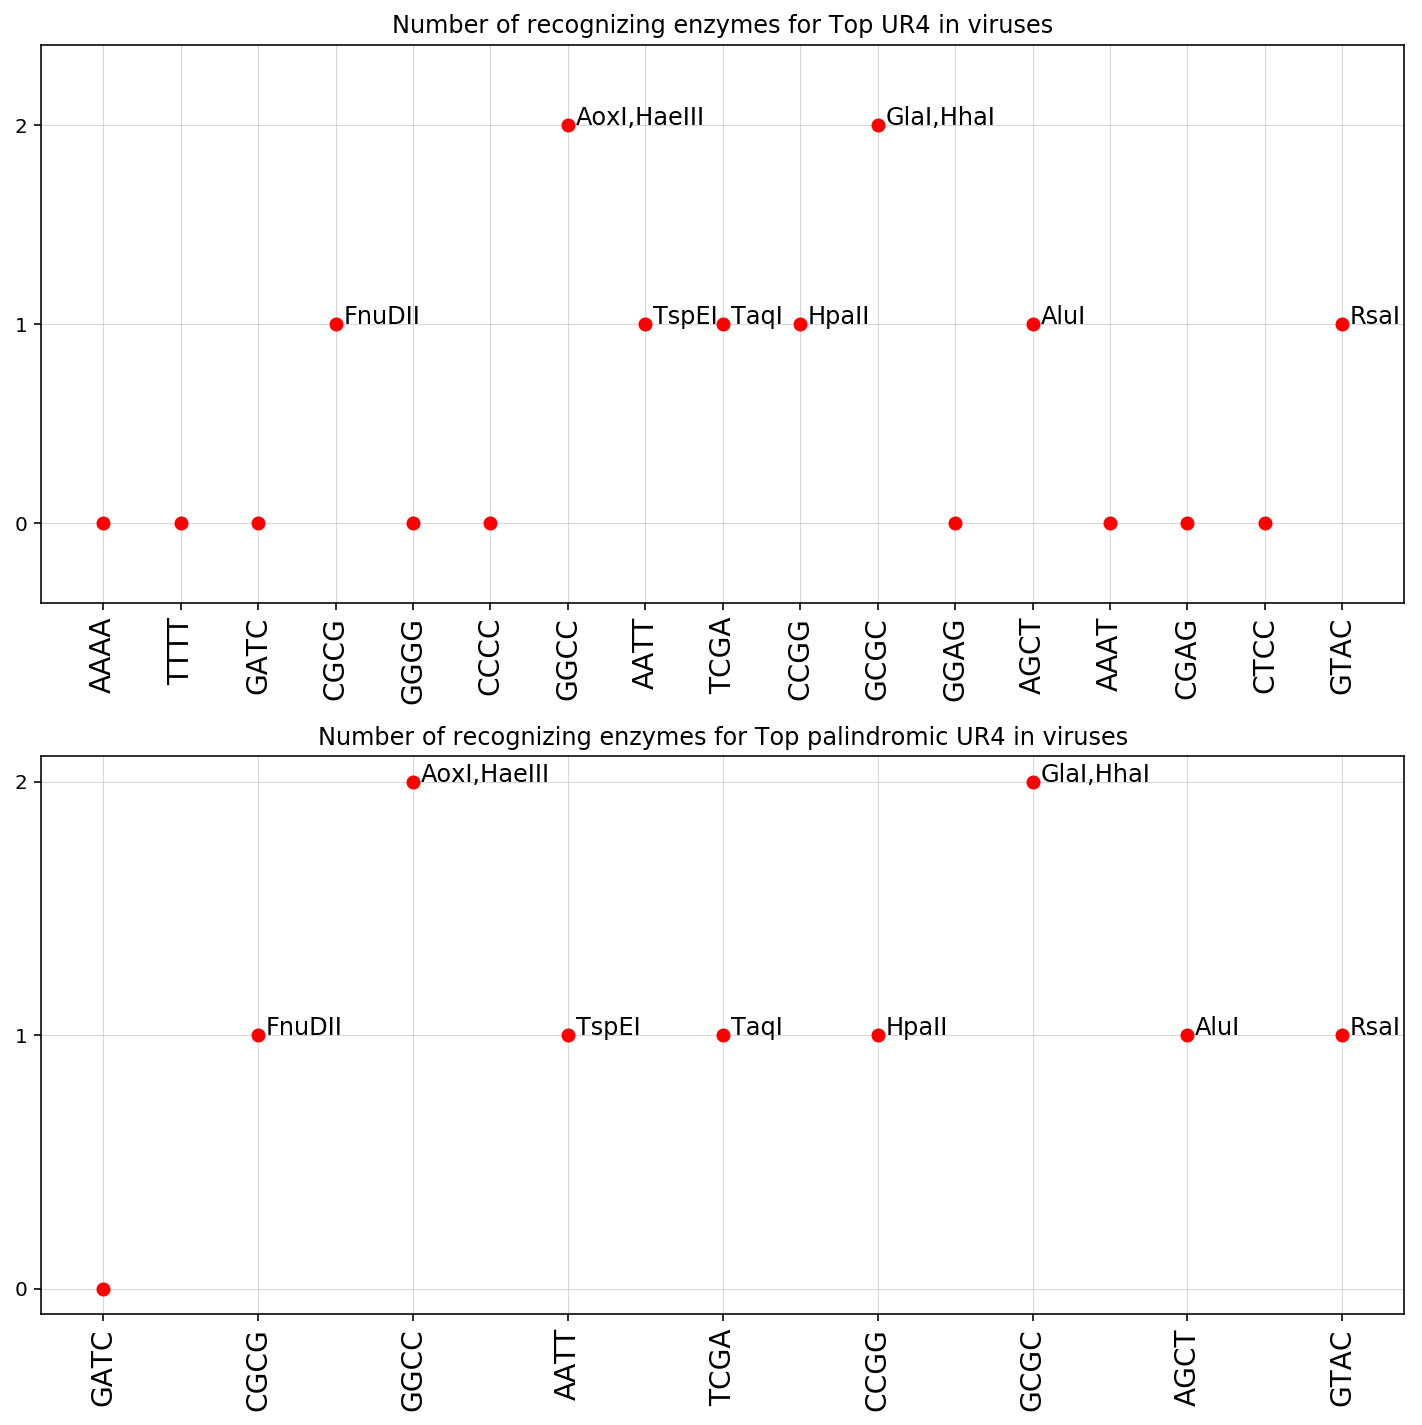

Figure saved in enz_rec_UR_m4.eps


In [3]:
from pprint import pprint

from Bio import motifs
import openpyxl as opxl
import matplotlib
import matplotlib.pyplot as plt

# excel with viruses UR size m=3,4,5
file = '/Users/yoramzarai/work/school/Simulation/Viruses/Data_stats/UR_rnd_dsDNA.xlsx'

# starndard abbreviations (currently not used)
nabbrev = { 'R' : ['G', 'A'],
            'Y' : ['C', 'T'],
            'M' : ['A', 'C'],
            'K' : ['G', 'T'],
            'S' : ['G', 'C'],
            'W' : ['A', 'T'],
            'B' : ['C', 'G', 'T'],
            'D' : ['A', 'G', 'T'],
            'H' : ['A', 'C', 'T'],
            'V' : ['A', 'C', 'G'],
            'N' : ['A', 'C', 'G', 'T']}

# dictionary with recog. seq. : Enzyme name
# This is manually taken from REBASE Type II Restriction Enzumes list 
# class of Recognition Sequences (http://rebase.neb.com/cgi-bin/classlist)
# recognition sequences of 4 bp
rseq_dict4 = { 'AATT' : ['TspEI'],
       'ACGT' : ['MaeII'], 
       'AGCT' : ['AluI'],
       'CATG' : ['NlaIII'], 
       'CCGG' : ['HpaII'],
       'CGCG' : ['FnuDII'],
       'CTAG' : ['DpnI', 'MboI'],
       'GCGC' : ['GlaI', 'HhaI'],
       'GGCC' : ['AoxI', 'HaeIII'],
       'GTAC' : ['RsaI'],
       'TCGA' : ['TaqI'],
       'TGCA' : ['CviRI'],
       'TTAA' : ['MseI']}

# recognition sequences of 5 bp
rseq_dict5 = {'ACGAG' : ['ObaBS10I'],
              'ACGGA' : ['TspGWI'],
              'ACGGC' : ['BcefI'],
              'ACTGG' : ['BsrI'],
              'ATGAA' : ['TspDTI'],
              'CAGTG' : ['BtsIMutI'],
              'CATCG' : ['CdiI'],
              'CCAGA' : ['BspNCI'],
              'CCATC' : ['BccI'],
              'CCCGC' : ['FauI'],
              'CCCGT' : ['BscGI'],
              'CCTTC' : ['Hin4II'],
              'CTCAG' : ['BseMII'],
              'GAAAG' : ['HpyUM032XIV'],
              'GAAGA' : ['MboII'],
              'GAAGT' : ['SthSt3II'],
              'GACGC' : ['HgaI'],
              'GAGTC' : ['PleI'],
              'GCAGC' : ['BbvI'],
              'GCAGT' : ['PenI'],
              'GCATC' : ['SfaNI'],
              'GCCGC' : ['NgoAVII'],
              'GCCTA' : ['Hpy99XIII'],
              'GCGAA' : ['Cla11845III'],
              'GCGAC' : ['TsuI'],
              'GCGTA' : ['HpyAXIV'],
              'GCTCC' : ['LmnI'],
              'GGATC' : ['BinI'],
              'GGATG' : ['FokI'],
              'GGGAC' : ['FinI'],
              'GGGTC' : ['SimI'],
              'GGTGA' : ['HphI'],
              'GTAAG' : ['Pba2294I'],
              'GTCTC' : ['BsmAI'],
              'TCGAG' : ['SpnRII'],
              'TCGTA' : ['UbaF11I'],
              'TGAAC' : ['Sbo46I']}
# ==============================================================================================
# select URs to process
colUR = 2  # column number (1 for m=3, 2 for m=4, 3 for m=5)
max_rows = 17 # top <max_rows> rows are used 
rseq_dict = rseq_dict4 if colUR==2 or colUR==1 else rseq_dict5
#rseq_dict = rseq_dict5;
ffig = 'enz_rec_UR_m'+str(colUR+2)+'.eps'
# ==============================================================================================
rrseq = list(rseq_dict.keys())
# reading the excel of UR sequences in dsDNA viruses
sheet = opxl.load_workbook(file).active
UR_name = sheet.cell(row=1,column=colUR).value
UR = []
for i in range(2,max_rows+2):
    UR.append(sheet.cell(row=i,column=colUR).value)

print('Testing top {} sequences in {}'.format(max_rows, UR_name))
test_seq = UR
#print(test_seq)
#print(rrseq)
# full match 
flag = [s for s in test_seq if s in rrseq]
# or, test if subset as well - this returns list of pairs where each pair
# is UR sequence, rrseq where UR was found (need the following two lines)
#tmp_flag = [j if y else i for i in test_seq for j in rrseq for y in range(2) if i in j] 
#flag = tmp_flag[1::2]
test_seq_homog = [i for i in test_seq if len(set(i))==1] # all URs that contain the same nucleotide m times

print('{:2.2f}% found as recognition sequences (excluding homog sequences {:2.2f}%):'\
      .format(len(flag)/len(test_seq)*100, len(flag)/(len(test_seq)-len(test_seq_homog))*100) )
for e, s in enumerate(flag,1):
    print('{i}. Found {seq}, recognize by {enzyme} enzyme'.format(i=e, seq=s, enzyme=','.join(rseq_dict[s])))

test_seq_pald = get_palindromic(test_seq) # all URs that are palindromic
flag_pald = [s for s in test_seq_pald if s in rrseq]
if len(test_seq_pald)>0: print('{:2.2f}% of palindromic URs found as recognition sequences'.format(len(flag_pald)/len(test_seq_pald)*100))

# number of enzymes each UR sequence is recognized by
num_enzyme = [len(rseq_dict[s]) if s in flag else 0 for s in test_seq]
name_enzyme = [','.join(rseq_dict[s]) if s in flag else '' for s in test_seq]

# number of enzymes each palindromic UR sequence is recognized by
num_enzyme_pald = [len(rseq_dict[s]) if s in flag_pald else 0 for s in test_seq_pald]
name_enzyme_pald = [','.join(rseq_dict[s]) if s in flag_pald else '' for s in test_seq_pald]

fig = plt.figure(1,figsize=(10,10)) 
if len(test_seq_pald)>0:
    ax1 = plt.subplot(2, 1, 1)
plt.plot(num_enzyme, 'ro', markersize=6)
plt.xticks(range(0,len(num_enzyme)), test_seq, rotation='vertical', fontsize=14)
plt.yticks(range(0,3))
#plt.ylabel('$n$')
plt.title('Number of recognizing enzymes for Top {} in viruses'.format(UR_name))
plt.grid(linestyle='-', linewidth=0.25)
for i, txt in enumerate(name_enzyme):
    plt.annotate(txt, (i, num_enzyme[i]), xytext=(i+0.1, num_enzyme[i]), fontsize=12)
plt.margins(x=.05, y=.2)

if len(test_seq_pald)>0:
    ax2 = plt.subplot(2, 1, 2)
    ax2.plot(num_enzyme_pald, 'ro', markersize=6)
    plt.xticks(range(0,len(num_enzyme_pald)), test_seq_pald, rotation='vertical', fontsize=14)
    plt.yticks(range(0,3))
    #plt.ylabel('$n$')
    plt.title('Number of recognizing enzymes for Top palindromic {} in viruses'.format(UR_name))
    plt.grid(linestyle='-', linewidth=0.25)
    for i, txt in enumerate(name_enzyme_pald):
        ax2.annotate(txt, xy=(i, num_enzyme_pald[i]), xytext=(i+0.05, num_enzyme_pald[i]), fontsize=12)
plt.tight_layout()

%config InlineBackend.figure_format = 'retina' # Jupyter double resolution plot output for Retina display
plt.show()
fig.savefig(ffig) #, transparent=True, dpi=450)
print('Figure saved in {}'.format(ffig))

# Function to read Jaspar individual PFM files

In [4]:
import os
import numpy as np

def parse_jaspar_TF(fname):
    '''Parses the .jaspar Individual PFMs file. See
    http://jaspar.genereg.net/downloads/.  
    File example:
    >MA0002.2	RUNX1
    A  [   287    234    123     57      0     87      0     17     10    131    500 ]
    C  [   496    485   1072      0     75    127      0     42    400    463    158 ]
    G  [   696    467    149      7   1872     70   1987   1848    251     81    289 ]
    T  [   521    814    656   1936     53   1716     13     93   1339   1325   1053 ]
    '''
    with open(fname, 'rt') as file:
        # read TF name
        fline = file.readline()
        TFname = fline.split()[1]
        
        # read PFM
        larray = np.array([line.split() for line in file]) # lines 2 to 5 have the same number of elements
        nucl = larray[0:,0] # first column (column 0) is the nucleotide letter
        pwm = larray[0:,2:-1] # second column to column before end are the PWM of the corresponding nucleotide
        cons_seq = ''.join([nucl[i] for i in np.argmax(pwm.astype(np.int), axis=0) ]) # consensus sequence
    return TFname, cons_seq, pwm, nucl

# Analyzing transcription factor sites

In [9]:
#=============================================================================================

# for Vertebrate
fname = '/Users/yoramzarai//work/school/Simulation/Viruses/Binding_sites/TFBS/Jaspar/JASPAR2018_CORE_vertebrates_non-redundant_pfms_jaspar/MA1142.1.jaspar'

with open(fname, 'rt') as file:
    # TF fname and name
    first_line = file.readline()
    kk = first_line.split()
    #bb = first_line.split()[1]
    #print('bb = {}'.format(bb))
    ffname = kk[0][1:]
    TFname = kk[1]
    #print(kk)
    #first_line = first_line.strip()
    #aa = first_line.split('\t')
    #fname = aa[0][1:]  # removing >
    #TFname = aa[1]
    #print(first_line)
    #print('{}, {}'.format(ffname, TFname))
    
    #vals = []
    #nucl = []
    qq = np.array([line.split() for line in file])
    print('qq = {}'.format(qq[0:,2:-1]))
    #ffname = qq[0,0]
    #TFname = qq[0,1]
    nucl = qq[0:,0]
    npvals = qq[0:,2:-1]
    npvals = npvals.astype(np.float)
    #print(qq[:,0])
    #print(qq[:,2:-1])
    #for c in range(0,4):
    #    Adata = file.readline()
    #    a1 = Adata.split()
    #    nucl.append(a1[0])
    #    vals.append(list(map(int, a1[2:-1])))
#print(vals)
#npvals = np.array(vals)  # PWM or PFM
print('npvals = {}'.format(npvals))
print(nucl)
print('max: {}'.format(np.amax(npvals, axis=0)))
agmax = np.argmax(npvals, axis=0)
print('argmax: {}'.format(agmax))
cons_seq = ''.join([nucl[i] for i in agmax ])
#print('TGGTTT' in cons_seq)
print('{TFname}: consensus seq = {seq}'.format(TFname=TFname, seq=cons_seq))
    
# now compare with function
a, b, c, d = parse_jaspar_TF(fname)
print('\nFunc: {} : {} \n {}\n{}'.format(a,b,c, d))

qq = [['265' '551' '30' '22' '864' '49' '98' '270' '912' '174']
 ['221' '127' '23' '61' '12' '581' '45' '641' '40' '212']
 ['279' '282' '34' '777' '82' '191' '187' '25' '17' '144']
 ['235' '40' '913' '140' '41' '180' '669' '64' '31' '470']]
npvals = [[265. 551.  30.  22. 864.  49.  98. 270. 912. 174.]
 [221. 127.  23.  61.  12. 581.  45. 641.  40. 212.]
 [279. 282.  34. 777.  82. 191. 187.  25.  17. 144.]
 [235.  40. 913. 140.  41. 180. 669.  64.  31. 470.]]
['A' 'C' 'G' 'T']
max: [279. 551. 913. 777. 864. 581. 669. 641. 912. 470.]
argmax: [2 0 3 2 0 1 3 1 0 3]
FOSL1::JUND: consensus seq = GATGACTCAT

Func: FOSL1::JUND : GATGACTCAT 
 [['265' '551' '30' '22' '864' '49' '98' '270' '912' '174']
 ['221' '127' '23' '61' '12' '581' '45' '641' '40' '212']
 ['279' '282' '34' '777' '82' '191' '187' '25' '17' '144']
 ['235' '40' '913' '140' '41' '180' '669' '64' '31' '470']]
['A' 'C' 'G' 'T']


# Parsing all Jaspar files of a Taxonomic group - Functions

In [6]:
from pprint import pprint
import openpyxl as opxl
import matplotlib
import matplotlib.pyplot as plt
import re

def get_all_Jaspar_TF_info(j_dname, ext_name='jaspar'):
    '''Reads all Jaspar files in input directory and
    retruns the TF_info dictionary, where key:seq, value: TF name'''
    TF_info = {} # get all TF info as key: seq, value: TF name
    for fname in [f for f in os.listdir(j_dname) if f.endswith(ext_name)]:
    #for fname in os.listdir(j_dname):
    #    if fname.endswith(ext_name):
        tfn, cons_seq, _, _ = parse_jaspar_TF(os.path.join(j_dname, fname))
        TF_info[cons_seq] = tfn
    return TF_info

def get_virus_URs_of_host(UR_xlsx_file, UR_tax_group):
    '''Gather all top viruses URs corresponding to a particular
    host domain and retruns the UR_taxg_info dictionary, 
    where key: host name, value: top UR'''
    sheet = opxl.load_workbook(UR_xlsx_file).active
    # get all top URs of viruses corresponding to tax_group
    UR_taxg_info = {}
    for i in [i for i in range(2,sheet.max_row+1) if sheet.cell(row=i,column=1).value == UR_tax_group]:
    #for i in range(2,sheet.max_row+1):
        #if sheet.cell(row=i,column=1).value == UR_tax_group:
        # key: host name, value: UR
        UR_taxg_info[sheet.cell(row=i,column=2).value] = sheet.cell(row=i,column=4).value
    return UR_taxg_info

# Scratch pad

Total of 167 TF sequences gathered
Total of 2 top URs sequences gathered


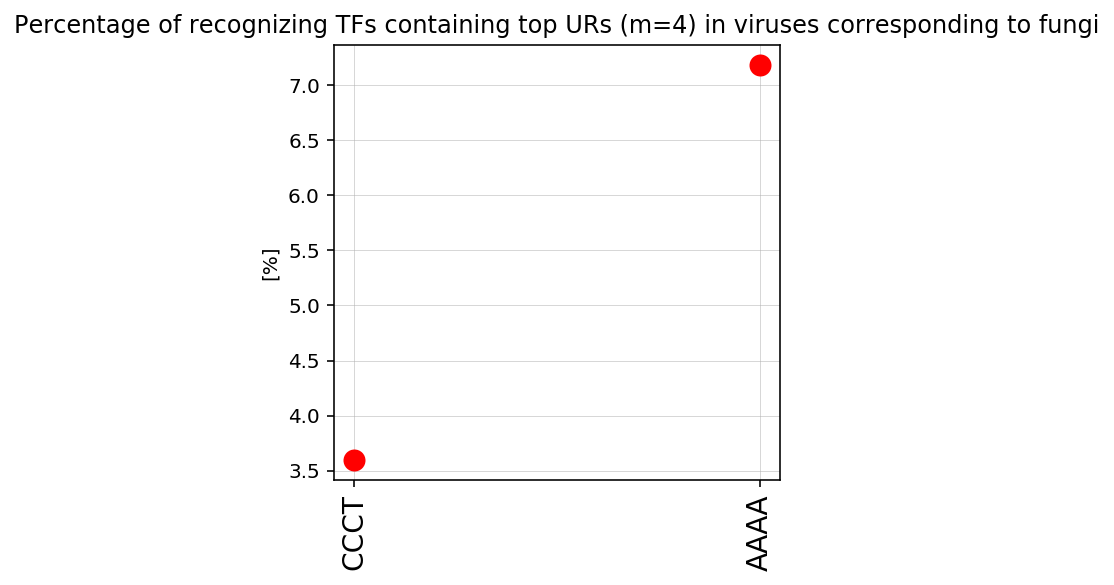

In [8]:
# ===============================================================================================
tax_group = 'fungi' #'vertebrates' # in Jaspar 'vertebrates' or 'plants' or 'fungi' or 'insects'
UR_tax_group = 'host Ensembl_Fungi' #'host Ensembl' # in my xlsx file: 'host Ensembl' or 'host Ensembl_Plants'
                              # or 'host Ensembl_Fungi' or 'host Ensembl_Metazoa'
mlen = 4  # 3 or 4 or 5

# ===============================================================================================
UR_xlsx_file = '/Users/yoramzarai/work/school/Simulation/Viruses/Data_stats/top_UR_m'+str(mlen)+'.xlsx'
ext_name = 'jaspar'
j_dname = '/Users/yoramzarai/work/school/Simulation/Viruses/Binding_sites/TFBS/Jaspar/JASPAR2018_CORE_'\
        +tax_group+'_non-redundant_pfms_jaspar/'

#TF_info = {} # get all TF info as key: seq, value: TF name
#for fname in os.listdir(j_dname):
#    if fname.endswith(ext_name):
#        tfn, cons_seq, _, _ = parse_jaspar_TF(os.path.join(j_dname, fname))
#        TF_info[cons_seq] = tfn

# gather all Jaspar TF information for the folder j_dname
TF_info = get_all_Jaspar_TF_info(j_dname)
print('Total of {} TF sequences gathered'.format(len(TF_info)))

#pprint(TF_info)

# now get URs of viruses corresponding to tax_group

#sheet = opxl.load_workbook(UR_xlsx_file).active
#dm = re.split(':',sheet.dimensions)
#print('xlsx dimension= {}:{}'.format(dm[0],dm[1]))


#UR_taxg_info = {}
#for i in range(2,int(dm[1][1:])):
#    if sheet.cell(row=i,column=1).value == UR_tax_group:
        # key: host name, value: UR
#        UR_taxg_info[sheet.cell(row=i,column=2).value] = sheet.cell(row=i,column=4).value
        #print('{} : {}'.format(sheet.cell(row=i,column=2).value, sheet.cell(row=i,column=4).value))

# get all top URs of viruses corresponding to tax_group
UR_taxg_info = get_virus_URs_of_host(UR_xlsx_file, UR_tax_group)


#pprint(UR_taxg_info)
# the set of all top URs in viruses corresponding to UR_tax_group
UR_taxg_set = [s for s in set(UR_taxg_info.values()) if s != None]
print('Total of {} top URs sequences gathered'.format(len(UR_taxg_set)))
#print('UR set = {}'.format(UR_taxg_set))

# now check if a subset of TF recognition sequence
rseq = list(TF_info.keys())

#for s in rrseq: print(s)
recog_info = {} # key: UR seq, value: [pairs of TF seq : TF name]
for s in UR_taxg_set:
    # pair of TF seq : TF name, where s is in TF seq
    recog_info[s] = [TF_info[i] if y else i for i in rseq for y in range(2) if s in i]
#print((recog_info))
#num_recog = [len(recog_info[s])/2 for s in UR_taxg_set] # number of TFs that UR is a subset of
num_recog = [(len(recog_info[s])/2)/len(TF_info)*100 for s in UR_taxg_set] # percentage of TFs that UR is a subset of


# plot
fig = plt.figure(2,figsize=(4,4)) 
ax = plt.plot(num_recog, 'ro', markersize=10)
plt.xticks(range(0,len(UR_taxg_set)), UR_taxg_set, rotation='vertical', fontsize=14)
#plt.yticks(range(0,3))
plt.ylabel('[%]')
plt.title('Percentage of recognizing TFs containing top URs (m={}) in viruses corresponding to {}'\
          .format(mlen, tax_group))
plt.grid(linestyle='-', linewidth=0.25)
#for i, txt in enumerate(name_enzyme):
#    ax1.annotate(txt, (i, num_enzyme[i]), xytext=(i+0.1, num_enzyme[i]), fontsize=12)
#ax1.margins(x=.05, y=.2)

# Parsing all Jaspar files of all Taxonomic group and test for UR as sub-seq

Figure saved in jaspar_UR.eps (in /Users/yoramzarai/work/school/Simulation/Viruses/jupyter)


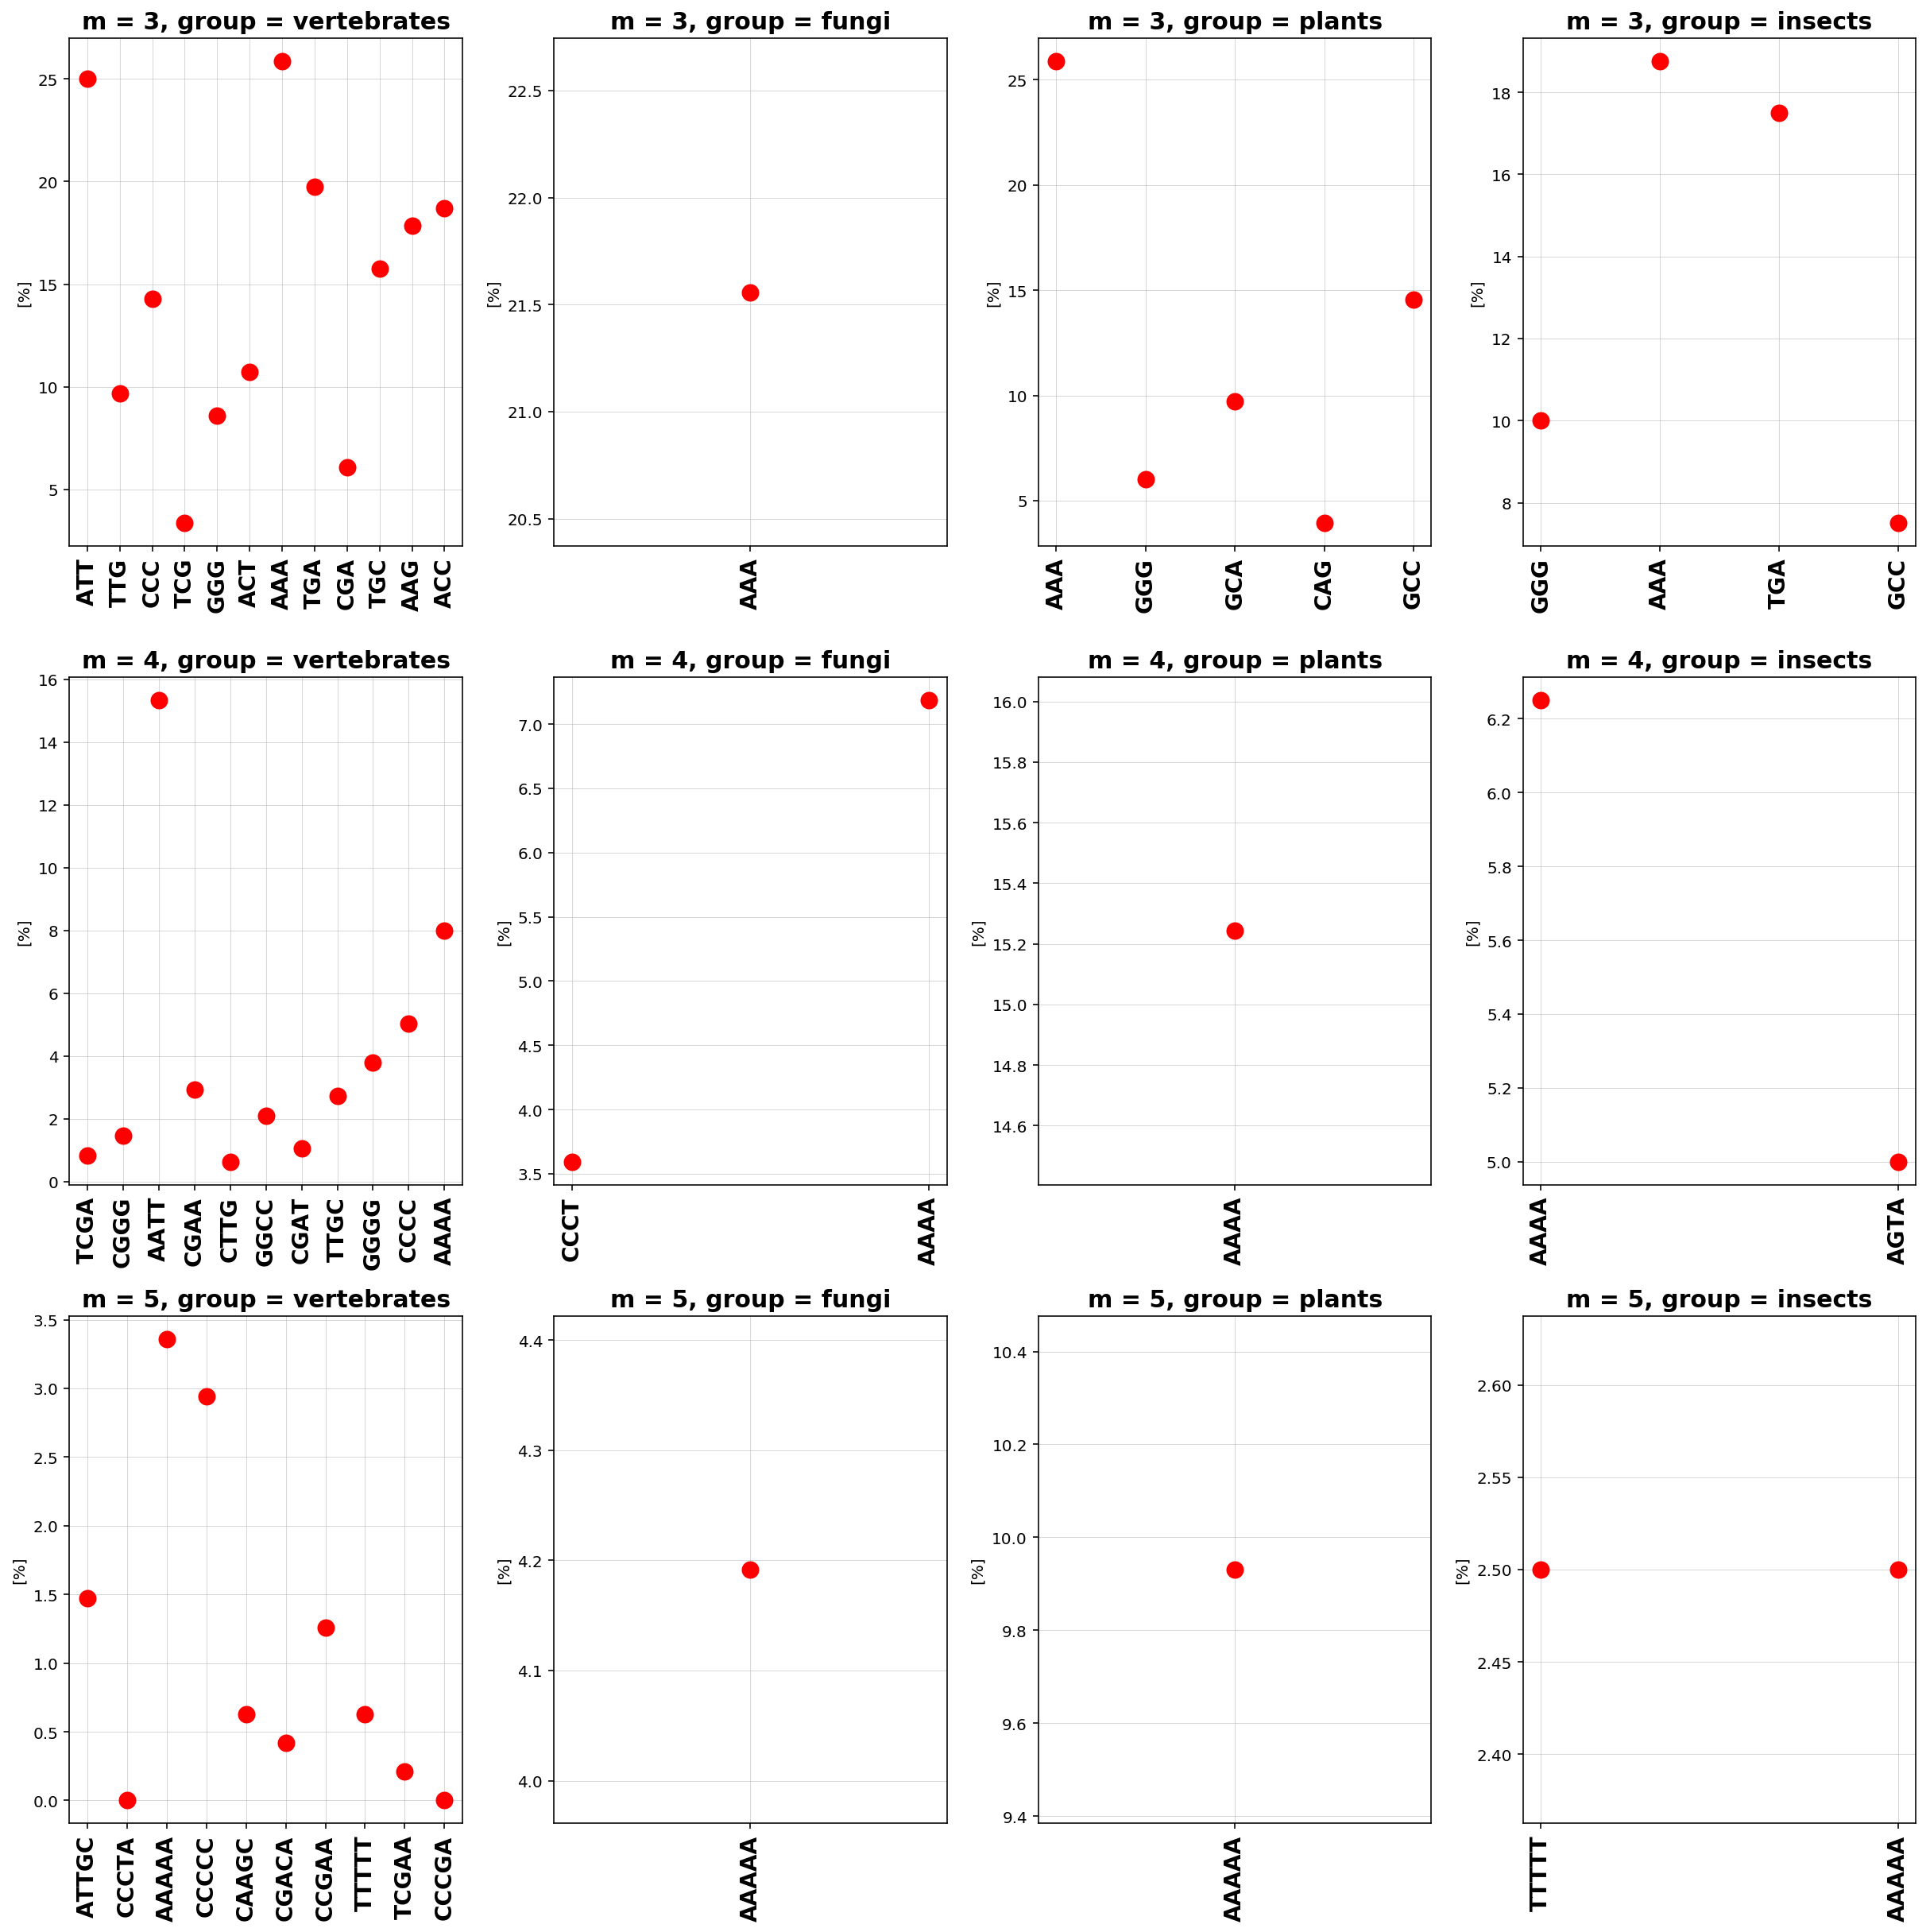

In [7]:
def process_jaspar_UR(j_dname, UR_xlsx_file, UR_tax_group, dbg = False):
    '''This function evaluates the number of TF recognition sites
    that contain one of the top viruses UR (corresponding to a
    specific host domain) as subset sequence. The evaluation
    is per host tax group (domain).'''
    # gather all Jaspar TF information in the folder j_dname
    TF_info = get_all_Jaspar_TF_info(j_dname)
    if dbg: print('Total of {} TF sequences gathered'.format(len(TF_info)))

    # get all top URs of viruses corresponding to tax_group
    UR_info = get_virus_URs_of_host(UR_xlsx_file, UR_tax_group)
    # the set of all top URs in viruses corresponding to UR_tax_group
    UR_set = [s for s in set(UR_info.values()) if s != None]
    if dbg: print('Total of {} top URs sequences gathered'.format(len(UR_set)))

    # check if a UR is a subsequence of a TF recognition sequence
    rseq = list(TF_info.keys())
    recog_info = {} # key: UR seq, value: [pairs of TF seq : TF name]
    for s in UR_set:
        # for each key s, value is a list of pairs of TF seq : TF name, where s is in TF seq
        recog_info[s] = [TF_info[i] if y else i for i in rseq for y in range(2) if s in i]
    num_recog = [(len(recog_info[s])/2)/len(rseq)*100 for s in UR_set] # percentage of TFs that UR is a subset of
    return num_recog, UR_set, TF_info, UR_info, recog_info

        
# ===================================================================================================        
# key: Jaspar taxonomic group, value: corresponding vgrp_type in the top_UR_m<val> spreadsheet
jaspar_vgrp_dict = { 
    'vertebrates' : 'host Ensembl',
    'fungi' : 'host Ensembl_Fungi',
    'plants' : 'host Ensembl_Plants',
    'insects' : 'host Ensembl_Metazoa'
                   }
mlens = [3,4,5] # all allowed mlen
fig_file = 'jaspar_UR.eps'
# ==================================================================================================
%config InlineBackend.figure_format = 'retina' # Jupyter double resolution plot output for Retina display
fig = plt.figure(3,figsize=(17,17)) 
#fig.suptitle('Main title', fontsize=14, fontweight='bold')
#htaxs = list(jaspar_vgrp_dict.keys())
index = 1
for mlen in mlens:
    UR_xlsx_file = '/Users/yoramzarai/work/school/Simulation/Viruses/Data_stats/top_UR_m'+str(mlen)+'.xlsx'
    #for htax in htaxs: # for htax in (k for k in jaspar_vgrp_dict.keys())
    for htax in (k for k in jaspar_vgrp_dict.keys()):
        j_dname = '/Users/yoramzarai/work/school/Simulation/Viruses/Binding_sites/TFBS/Jaspar/JASPAR2018_CORE_'\
        +htax+'_non-redundant_pfms_jaspar/'
        num_recog, UR_set, _, _, _ = process_jaspar_UR(j_dname, UR_xlsx_file, jaspar_vgrp_dict[htax])
        
        # plot
        ax1 = plt.subplot(len(mlens), len(jaspar_vgrp_dict), index)
        ax = plt.plot(num_recog, 'ro', markersize=10)
        plt.xticks(range(0,len(UR_set)), UR_set, rotation='vertical', fontsize=14, fontweight='bold')
        plt.ylabel('[%]')
        plt.title('m = {}, group = {}'.format(mlen, htax), fontsize=15, fontweight='bold')
        plt.grid(linestyle='-', linewidth=0.25)
        plt.tight_layout()
        index += 1

fig.savefig(fig_file) #, transparent=True, dpi=450)
print('Figure saved in {} (in {})'.format(fig_file, os.getcwd()))